## Linear Regression

Summary here: http://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

In [1]:
from common import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
import pylab

## Explore

In [2]:
#Use Pandas To Explore
df = datasets.get_advertising_data()

-- found locally


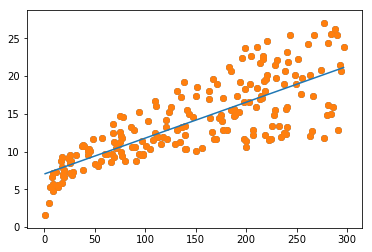

In [8]:
# TV v Sales
plt.scatter(df.TV, df.sales)
plt.plot(np.unique(df.TV), np.poly1d(np.polyfit(df.TV, df.sales, 1))(np.unique(df.TV)))
plt.show()

## Load Data

In [12]:
#Load data using numpy
def load_data(filepath):
    return np.loadtxt(filepath, skiprows=1, delimiter=",", usecols=(1,2,3,4))

data = load_data('./data/advertising.csv')
print ("Data Shape: "+str(data.shape))

#Features are TV, Radio, Newspaper
#The last column is Sales (y)
features = data[:,[0,1,2]]
targets = data[:,3]
targets.shape = (200,1) #reshape to keep consistent w features

print ("Features shape: "+str(features.shape))
print (features[:3])
print ("Targets shape: "+str(targets.shape))
print (targets[:3])

Data Shape: (200, 4)
Features shape: (200, 3)
[[   1.   230.1   37.8]
 [   2.    44.5   39.3]
 [   3.    17.2   45.9]]
Targets shape: (200, 1)
[[ 69.2]
 [ 45.1]
 [ 69.3]]


## Visualize

(200,)


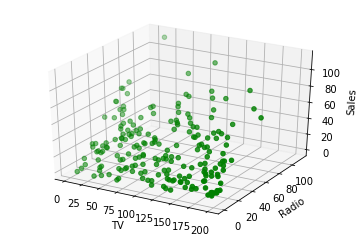

In [15]:
xlabel='TV'
ylabel='Radio'
zlabel='Sales'
x = data[:, 0]
y = data[:, 1]
z = data[:, 3]
print (x.shape)

#http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#getting-started
#http://matplotlib.org/xkcd/examples/color/colormaps_reference.html
    
def plot_3d_scatter(x1,x2,y,x1_label,x2_ylabel,zlabel):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = 100
    for c, m, zl, zh in [('g', 'o', -50, -25)]:
        ax.scatter(x, y, z, c=c, marker=m)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()
        
plot_3d_scatter(x,y,z,xlabel, ylabel, zlabel)

## Feature Normalization

Gradient Descent is faster when each of our input values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Our goal will be to "normalize" our input values so they are all in the range of -1 to 1.

A simple approach to normalization:
1. For each feature column
2. Subtract the mean of the column (mean normalization)
3. Divide by the range of the column (feature scaling)

In [18]:
def normalize_feature(feature):
    mean = np.mean(feature)
    value_range = np.amax(feature) - np.amin(feature)
    feature -= mean
    feature /= value_range
    
def normalize(features):
    for feature in features.T:
        normalize_feature(feature)
    

normalize(features)
print ("Normalized Features")
print (features[:3])
print ("OUT shape"+str(features.shape))
print (np.max(features))
print (np.min(features))

Normalized Features
[[-0.5         0.28088434  0.29306452]
 [-0.49497487 -0.34677883  0.32330645]
 [-0.48994975 -0.43910213  0.45637097]]
OUT shape(200, 3)
0.530967741935
-0.5


## Numpy Dot Product

Before we continue, it's helpful to understand how Dot Product works in Numpy. numpy.dot() can be used on both 1D and 2D arrays.

* https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
* https://www.youtube.com/watch?v=yAgqlTfWc9E
* http://wiki.fast.ai/index.php/Linear_Algebra_for_Deep_Learning#Dot_Product
* http://wiki.fast.ai/index.php/Linear_Algebra_for_Deep_Learning#Multiplication_20

**Dot Product of Two Vectors**

In [19]:
# [ a1 ]   [ a2 ]
# [ b1 ] * [ b2 ]  =  a1*a2 + b1*b2 + c1*c2
# [ c1 ]   [ c2 ]

a = np.array([1,2,3])
b = np.array([4,5,6])

# 1*4 + 2*5 + 3*6  =  32
np.dot(a,b)

32

**Matrix Multiplication**

* Input: columns of left == rows of right
* Output Dimensions: rows of left and columns of right

In [20]:
# [ a b ]  *  [ c d ]  =  [a*c+b*e  a*d+b*f]      
#            [ e f ]

# left is 1 x 2 and right is 2 x 2
# cols of left == rows of right

a = np.array([
        [1, 2]
    ])
assert a.shape == (1,2)

b = np.array([
        [3, 4],
        [5, 6]
    ])
assert b.shape == (2,2)

# output dims = rows of left (1) and cols of right (2)
# [1*3 + 2*5    1*4+2*6] =   [13 16]
np.dot(a,b)

array([[13, 16]])

## Add Bias

In [21]:
# Add Bias Column for W0
bias = np.ones(shape=(len(features),1))
features = np.append(bias, features, axis=1)

## Prepare Weights

In [24]:
W0 = 0.0
W1 = 0.0
W2 = 0.0
W3 = 0.0
weights = np.array([
        [W0],
        [W1],
        [W2],
        [W3]
    ])

#We choose dimensions for the weights matrix 
#that can be multiplied by the feature matrix's
print ("Features:"+str(features.shape))
print ("Weights:"+str(weights.shape))
print ("Product:(Rows of Features, Cols of Weights) = (200,1)")

Features:(200, 4)
Weights:(4, 1)
Product:(Rows of Features, Cols of Weights) = (200,1)


## Predict Function

y = W0 + W1x1 + W2x2 + W3x3

In [25]:
def predict(features, weights):
    return np.dot(features,weights)
    
predictions = predict(features, weights)
print (weights)
print (np.round(features[:4],2))
print (predictions[:3])
print (targets[:3])
print (features.shape, predictions.shape, targets.shape)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[ 1.   -0.5   0.28  0.29]
 [ 1.   -0.49 -0.35  0.32]
 [ 1.   -0.49 -0.44  0.46]
 [ 1.   -0.48  0.02  0.36]]
[[ 0.]
 [ 0.]
 [ 0.]]
[[ 69.2]
 [ 45.1]
 [ 69.3]]
(200, 4) (200, 1) (200, 1)


## Cost Function

The predict function is nice, but for our purposes we don't really need  it. What we need is a cost function so we can find the derivative and start optimizing our weights. 

For our purposes, lets use Mean Squared Error. The formula is:

1/2N * SUM[ (y - (mx + b))^2 ]

* N number of observations
* 1/2N we multiply N by 2 to make our gradient calculation simpler
* SUM[ ] summation after iterating through all data points

In [26]:
# Using MSE
def cost_function(features, targets, weights):
    '''
    Features:(200,4)
    Targets: (200,1)
    Weights:(4,1)
    Returns 1D matrix of predictions
    '''
    N = len(targets)
    
    predictions = predict(features, weights)
    
    #Take the squared error of each row
    sq_error = (predictions - targets)**2

    #Return the mean sum squared error among predictions
    return 1.0/(2*N) * sq_error.sum()
    
cost_function(features,targets,weights)

702.74185

## Gradient Descent

**Function**<br>
y = W0 + W1x1 + W2x2 + W3x3

**Gradient**<br>
Again using the chain rule we can compute the gradient--A vector of partial derivatives describing the cost function slope for each weight.

* d/dW0 = -(y - (W0 + W1x1 + W2x2 + W3x3))      #bias weight is multiplied by 1
* d/dW1 = -x1(y - (W0 + W1x1 + W2x2 + W3x3))
* d/dW2 = -x2(y - (W0 + W1x1 + W2x2 + W3x3))
* d/dW3 = -x3(y - (W0 + W1x1 + W2x2 + W3x3))

In [27]:
def update_weights(features, targets, weights, lr):
    '''
    Features:(200, 4)
    Targets: (200, 1)
    Weights:(4, 1)
    '''
    predictions = predict(features, weights)
    
    #Extract our features
    x0 = features[:,0]   #This is always 1, since its cooresponding weight, W0 is a constant not a coefficient
    x1 = features[:,1]
    x2 = features[:,2]
    x3 = features[:,3]
    
    #Loop through all observations, calculate the derivative/N for each weight and add to g_w..
    g_w0 = -x0*(targets - predictions)
    g_w1 = -x1*(targets - predictions)
    g_w2 = -x2*(targets - predictions)
    g_w3 = -x3*(targets - predictions)
    
    # Subtract the mean of the cooresponding cost function derivatives
    # Times the learning Rate (lr) from each Weight
    # Subtract b/c gradient points in direction of steepest ASCENT
    weights[0][0] -= (lr * np.mean(g_w0))
    weights[1][0] -= (lr * np.mean(g_w1))
    weights[2][0] -= (lr * np.mean(g_w2))
    weights[3][0] -= (lr * np.mean(g_w3))
    
    return weights

update_weights(features, targets, weights, .0005)

array([[  1.52770000e-02],
       [  5.68434189e-21],
       [  5.54134516e-19],
       [ -2.01465511e-18]])

## Refactor?
We could update this code to take any number of features + weights by performing a loop through the features and weights matrices. However there is also another, even better technique:

**Vectorized Gradient Descent**<br>
We use the same formulas as above, but instead of operating on a single feature + weight, we use their matrix equivalents.

d/dW1 = -x1(y - (W0 + W1x1 + W2x2 + W3x3))<br>
d/dW1 = -x1(y - prediction)<br>
d/dW1 = -x1(prediction_diff)<br>

Now, replace y and prediction with their matrices containing all samples. Replace x1 with our entire features matrix.

features = [<br>
    [ x0, x1, x2, x3]<br>
    [ x0, x1, x2, x3]<br>
    [ x0, x1, x2, x3]<br>
]

prediction_diff = [<br>
[1],<br>
[2],<br>
[3],<br>
...<br>
]

Math Explanation:
* https://www.coursera.org/learn/machine-learning/resources/QQx8l

In [36]:
# Vectorized Gradient Descent
# gradient = features.T * (features * weights - targets) / N

def update_weights_vectorized(features, targets, weights, lr):
    '''
    Features:(200, 4)
    Targets: (200, 1)
    Weights:(4, 1)
    '''    
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 - Calculate error/loss
    error = targets - predictions
    
    #3 Transpose features from (200, 4) to (4, 200)
    # So we can multiply w the (200,1)  error matrix.
    # Returns a (4,1) matrix holding 4 partial derivatives -- 
    # one for each feature -- representing the aggregate 
    # slope of the cost function across all observations
    gradient = np.dot(-features.T,  error)

    #4 Take the average error derivative for each feature
    gradient /= N

    #5 - Multiply the gradient by our learning rate
    gradient *= lr
    
    #6 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

update_weights_vectorized(features, targets, weights, .0005)

array([[ 0.04580809],
       [-0.00097653],
       [ 0.0003564 ],
       [ 0.00229681]])

## Train

In [37]:
def train(features, targets, weights, lr, iters):
    cost_history = []
    
    for i in range(iters):
        weights = update_weights(features, targets, weights, lr)
        
        #Calculate error for auditing purposes
        cost = cost_function(features, targets, weights)
        cost_history.append(cost)
        
        # Log Progress
        if i % 50 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))
        
    print ("Final cost: "+str(cost) + " weights:"+str(weights))
    return weights, cost_history

## Visualize

In [31]:
def graph_error(error_history):
    iterations = [i for i in range(1,len(error_history)+1)]
    plt.plot(iterations, error_history)
    plt.title('Error Rate')
    plt.xlabel('Training Iterations')
    plt.ylabel('Mean Squared Error')
    plt.show()

## Run

In [38]:
def run():
    # Set Hyperparameters
    lr = .005
    iters = 1000
    
    data = load_data("./data/linear.csv")

    # Features are TV, Radio, Newspaper
    # The last column is Sales (y)
    features = data[:,[0,1,2]]
    targets = data[:,3]
    targets.shape = (200,1)
    normalize(features)

    # Add Bias Column for W0
    bias = np.ones(shape=(len(features),1))
    features = np.append(bias, features, axis=1)

    # Initialize Weights
    W0 = 0.0
    W1 = 0.0
    W2 = 0.0
    W3 = 0.0
    weights = np.array([
            [W0],
            [W1],
            [W2],
            [W3]
        ])
    
    #Test Predictions
    predictions = predict(features, weights)
    print ("Test Predictions:"+str(predictions[:3]))
    
    # Test Cost
    cost = cost_function(features, targets, weights)
    print ("Test Cost:"+str(cost))
    
    # Train
    print ("\nTRAINING ----------")
    weights, cost_hist = train(features, targets, weights, lr, iters)
    
    graph_error(cost_hist)

Test Predictions:[[ 0.]
 [ 0.]
 [ 0.]]
Test Cost:111.858125

TRAINING ----------
iter: 0 cost: 110.87743035
iter: 50 cost: 72.5052698481
iter: 100 cost: 49.2605494317
iter: 150 cost: 35.179584999
iter: 200 cost: 26.6497530283
iter: 250 cost: 21.4826329923
iter: 300 cost: 18.3525444326
iter: 350 cost: 16.4564293196
iter: 400 cost: 15.30781884
iter: 450 cost: 14.6120245684
iter: 500 cost: 14.1905329687
iter: 550 cost: 13.9352058184
iter: 600 cost: 13.7805361792
iter: 650 cost: 13.6868418843
iter: 700 cost: 13.6300846504
iter: 750 cost: 13.595702796
iter: 800 cost: 13.5748752851
iter: 850 cost: 13.5622585947
iter: 900 cost: 13.5546157766
iter: 950 cost: 13.5499859834
Final cost: 13.5472248121 weights:[[  1.39291947e+01]
 [  5.02614395e-16]
 [ -1.83688775e-15]
 [  6.31553476e-16]]


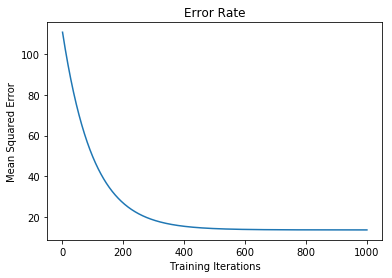

In [39]:
run()

## Sources

* http://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html
* https://www.coursera.org/learn/machine-learning/resources/QQx8l
* http://aimotion.blogspot.com/2011/10/machine-learning-with-python-linear.html